In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.patches as patches
import matplotlib as mpl
import matplotlib.pyplot as plt
from modplot import velovect
mpl.rc('figure',  figsize=(8, 8))
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Arial'
mpl.rcParams['mathtext.it'] = 'Arial:italic'
mpl.rcParams['mathtext.bf'] = 'Arial:bold'

In [3]:
# times = [250,500,750]
times = [370,740,1110]
# times = [0,250,550,750]
# times = [0,250]

FileNotFoundError: U1-5_370.txt not found.

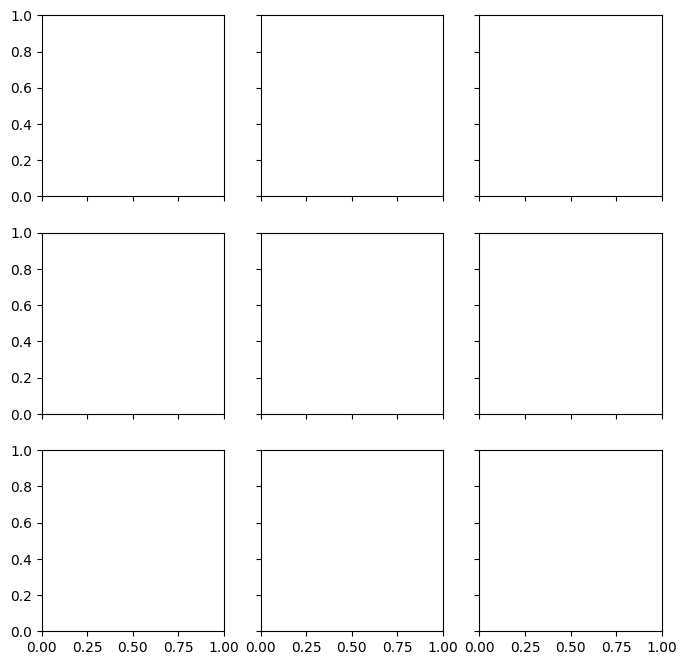

In [4]:
boxsize = 32
betas = ['-5','0','5']
# betas = ['5','5','5']
borderwidth = 4
Y, X = np.mgrid[128 - boxsize:128 + boxsize,128 - boxsize:128 + boxsize]
fig, axes = plt.subplots(ncols=len(times),nrows=len(betas),sharex=True, sharey=True,figsize=(8,8))
betaIndex = 0
for beta in betas:
    
    index = 0
    for i in times:
        
        U = np.loadtxt("U1"+beta + "_"+str(i) + ".txt")
        V = np.loadtxt("V1"+beta + "_"+str(i) + ".txt")
        px = np.loadtxt("px1" + beta + "_"+str(i) + ".txt")
        py = np.loadtxt("py1" + beta + "_"+str(i) + ".txt")
        s=1
        
        U = U[128 - boxsize:128 + boxsize,128 - boxsize:128 + boxsize]  # == Lons[Xspan[0]:Xspan[1]+1, Yspan[0]:Yspan[1]+1]
        V = V[128 - boxsize:128 + boxsize,128 - boxsize:128 + boxsize]

        # f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,18))
        # ax1.quiver(X[::s,::s],Y[::s,::s],U[::s,::s],V[::s,::s],scale=5)
        # ax1.set(aspect='equal')
        # plt.xlim((0,40))
        # plt.ylim((0,40))
        ax = axes[betaIndex][index]
        ax.spines['top'].set_linewidth(borderwidth)
        ax.spines['bottom'].set_linewidth(borderwidth)
        ax.spines['left'].set_linewidth(borderwidth)
        ax.spines['right'].set_linewidth(borderwidth)
        speed = np.sqrt(U**2 + V**2)
        nspeed = speed / speed.max();
        # speedSqrd = U**2 + V**2
        # axes[index].pcolormesh(X,Y,speed)
        if index != -1:
            # lw = 10 * speedSqrd / speedSqrd.max()
            lw = 4 * nspeed
            # lw = 2
            # lw = 1
            arrsty = patches.ArrowStyle("Simple",head_length=.4, head_width=.2, tail_width=.0)
            ax.streamplot(X,Y,U,V, color=nspeed,density = 1.5,linewidth = lw,arrowstyle=arrsty, arrowsize=1,cmap='plasma')
            # axes[index].quiver(X,Y,U,V, color='k',density = 1,linewidth = lw,arrowstyle='->', arrowsize=2)
        # else:
        #     plt.quiver(X[::s,::s],Y[::s,::s],U[::s,::s],V[::s,::s],scale=5)
        p1pos = (px[0], py[0])
        p2pos = (px[1], py[1])
        p1direction = (0,1)
        p2direction = (0,1)
        pRadius = 5.0
        particle1 = plt.Circle(p1pos, pRadius, fill=True,linewidth=2,zorder=10,edgecolor="black",facecolor="white")
        ax.plot([px[0], px[0] + pRadius*p1direction[0]], [py[0],py[0] + pRadius*p1direction[1]], color='black', linewidth=2,zorder = 20)
        particle2 = plt.Circle(p2pos, pRadius, fill=True,linewidth=2,zorder=10,edgecolor="black",facecolor="white")
        ax.plot([px[1], px[1] + pRadius*p2direction[0]], [py[1],py[1] + pRadius*p2direction[1]], color='black', linewidth=2,zorder = 20)
        ax.add_patch(particle1)
        ax.add_patch(particle2)
        ax.set(aspect='equal')
        # axes[index].set_facecolor('black')
        # plt.title(i)
        print(ax.get_xlim())
        ax.set_xlim((96.0, 159.0))
        ax.set_ylim((96.0, 159.0))
        if i==times[0]:
            ax.set_ylabel("y [lattice units]",fontsize=12)
        ax.set_xlabel("x [lattice units]",fontsize=12)
        # Change the x and y ticks
        ax.set_xticks([108,128,148])  # Specify the locations of the x ticks
        ax.set_yticks([108,128,148])  # Specify the locations of the y ticks
        if i == times[0]:
            ax.tick_params(axis='both', which='major', labelsize=12,length = 5, width = 2.5)
        else :
            ax.tick_params(axis='x', which='major', labelsize=12,length = 5, width = 2.5)
            ax.tick_params(axis='y', which='major', labelsize=12,length = 0, width = 0)

        # You can also set custom labels for the ticks if desired
        # ax.set_xticklabels(['96', '128', '144'])  # Set custom labels for the x ticks
        # ax.set_yticklabels(['96', '128', '144'])  # Set custom labels for the y ticks
        # axes[index].set_xlabel("x [lattice units]")
        # axes[index].set_ylabel("y [lattice units]")
        index+=1
        print(index)
    betaIndex+=1
cbar_ax = fig.add_axes([0.97, 0, 0.02, 0.7])  # Define the position of the colorbar axes
cbar = plt.colorbar(ax.collections[0], cax=cbar_ax)  # Create the colorbar
cbar.set_label(r'$\mathrm{v}/\mathrm{v}_{\mathrm{max}}$', fontsize=12,rotation = 0)
cbar_ax.yaxis.set_label_coords(1.5, 1.05)
cbar.ax.tick_params(labelsize=10)  # Set the tick label size
plt.subplots_adjust(left=0,
                    bottom=0,
                    right=0.95,
                    top=0.95,
                    wspace=0,
                    hspace=0)
plt.savefig('C:\coolbeans\coolbeans.png', dpi=600,bbox_inches='tight')
plt.show()

(112.0, 143.0)


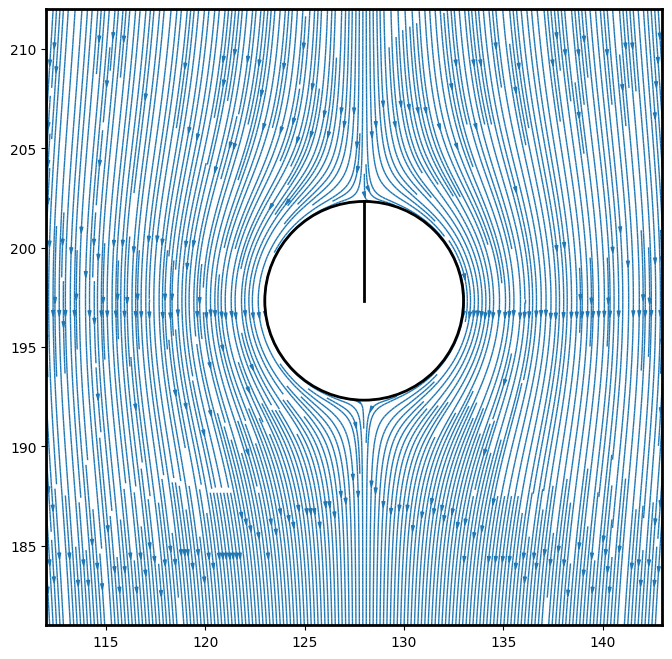

In [48]:
path = "2023/00/31/"
beta = "0"
# time = 12000
time = 101000
# time = 110418
boxsize = 16
borderwidth = 2
U = np.loadtxt(path + "U"+beta + "_"+str(time) + ".txt")
V = np.loadtxt(path + "V"+beta + "_"+str(time) + ".txt")
px = np.loadtxt(path + "px" + beta + "_"+str(time) + ".txt")
py = np.loadtxt(path + "py" + beta + "_"+str(time) + ".txt")
velx = np.loadtxt(path + "velx" + beta + "_"+str(time) + ".txt")
vely = np.loadtxt(path + "vely" + beta + "_"+str(time) + ".txt")
theta = np.loadtxt(path + "theta" + beta + "_"+str(time) + ".txt")
U -= velx
V -= vely
U = U[int(py) - boxsize:int(py) + boxsize,int(px) - boxsize:int(px) + boxsize]  # == Lons[Xspan[0]:Xspan[1]+1, Yspan[0]:Yspan[1]+1]
V = V[int(py) - boxsize:int(py) + boxsize,int(px) - boxsize:int(px) + boxsize]
Y, X = np.mgrid[int(py) - boxsize:int(py) + boxsize,int(px) - boxsize:int(px) + boxsize]
# U = U[int(px) - boxsize:int(px) + boxsize,int(py) - boxsize:int(py) + boxsize]  # == Lons[Xspan[0]:Xspan[1]+1, Yspan[0]:Yspan[1]+1]
# V = V[int(px) - boxsize:int(px) + boxsize,int(py) - boxsize:int(py) + boxsize]
# Y, X = np.mgrid[int(px) - boxsize:int(px) + boxsize,int(py) - boxsize:int(py) + boxsize]
# U = U[px[0] - boxsize:px[0] + boxsize,py[0] - boxsize:py[0] + boxsize]  # == Lons[Xspan[0]:Xspan[1]+1, Yspan[0]:Yspan[1]+1]
# V = V[px[0] - boxsize:px[0] + boxsize,py[0] - boxsize:py[0] + boxsize]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.spines['top'].set_linewidth(borderwidth)
ax.spines['bottom'].set_linewidth(borderwidth)
ax.spines['left'].set_linewidth(borderwidth)
ax.spines['right'].set_linewidth(borderwidth)
speed = np.sqrt(U**2 + V**2)
nspeed = speed / speed.max();

# lw = 4 * nspeed
# streamdens = 1.5
# lw = 1 * nspeed
lw = 1
streamdens = 6

arrsty = patches.ArrowStyle("Simple",head_length=.4, head_width=.2, tail_width=.0)
ax.streamplot(X,Y,U,V,density = streamdens,linewidth = lw,arrowstyle=arrsty, arrowsize=1,cmap='plasma')

p1pos = (px, py)
# p1pos = (px[0], py[0])
# p2pos = (px[1], py[1])
p1direction = (0,1)
pRadius = 5.0
particle1 = plt.Circle(p1pos, pRadius, fill=True,linewidth=2,zorder=10,edgecolor="black",facecolor="white")
ax.plot([px, px + pRadius*p1direction[0]], [py,py + pRadius*p1direction[1]], color='black', linewidth=2,zorder = 20)
# ax.plot([px[0], px[0] + pRadius*p1direction[0]], [py[0],py[0] + pRadius*p1direction[1]], color='black', linewidth=2,zorder = 20)
# particle2 = plt.Circle(p2pos, pRadius, fill=True,linewidth=2,zorder=10,edgecolor="black",facecolor="white")
# ax.plot([px[1], px[1] + pRadius*p2direction[0]], [py[1],py[1] + pRadius*p2direction[1]], color='black', linewidth=2,zorder = 20)
ax.add_patch(particle1)


# ax.add_patch(particle2)
ax.set(aspect='equal')
# axes[index].set_facecolor('black')
# plt.title(i)
print(ax.get_xlim())
# ax.set_xlim((96.0, 159.0))
# ax.set_ylim((96.0, 159.0))
# if i==times[0]:
#     ax.set_ylabel("y [lattice units]",fontsize=12)
# ax.set_xlabel("x [lattice units]",fontsize=12)
# Change the x and y ticks
# ax.set_xticks([108,128,148])  # Specify the locations of the x ticks
# ax.set_yticks([108,128,148])  # Specify the locations of the y ticks
# if i == times[0]:
#     ax.tick_params(axis='both', which='major', labelsize=12,length = 5, width = 2.5)
# else :
#     ax.tick_params(axis='x', which='major', labelsize=12,length = 5, width = 2.5)
#     ax.tick_params(axis='y', which='major', labelsize=12,length = 0, width = 0)

# You can also set custom labels for the ticks if desired
# ax.set_xticklabels(['96', '128', '144'])  # Set custom labels for the x ticks
# ax.set_yticklabels(['96', '128', '144'])  # Set custom labels for the y ticks
# axes[index].set_xlabel("x [lattice units]")
# axes[index].set_ylabel("y [lattice units]")
# index+=1
# print(index)

In [37]:
0.00068*10*6/0.2

0.20400000000000001

In [7]:
def erCoeff(b,n,a,r,the):
    return n/2.0 * b * (a**(n+1.0)/r**(n+1.0) - a**(n-1.0)/r**(n-1.0)) * np.cos(n*the)
def ethetaCoeff(b,n,a,r,the):
    return 1.0/2.0 * b * (n*a**(n+1.0)/r**(n+1.0) - (n-2.0)*a**(n-1.0)/r**(n-1.0)) * np.sin(n*the)

(112.0, 143.0)


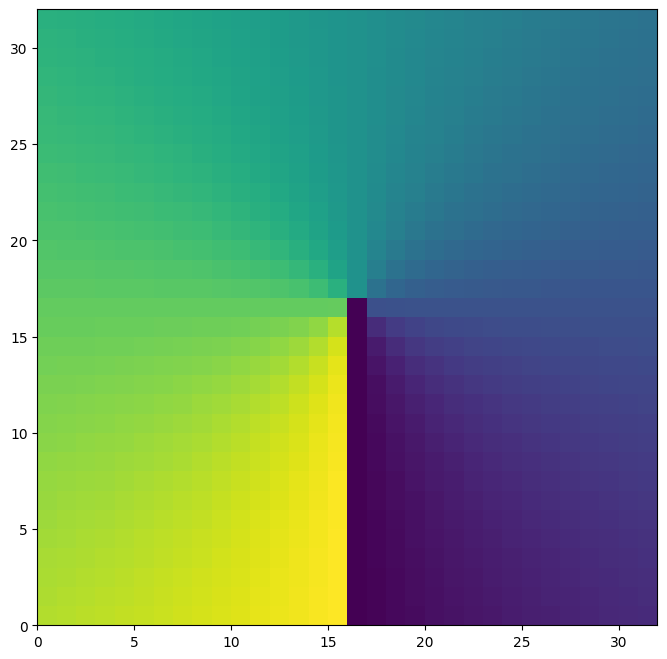

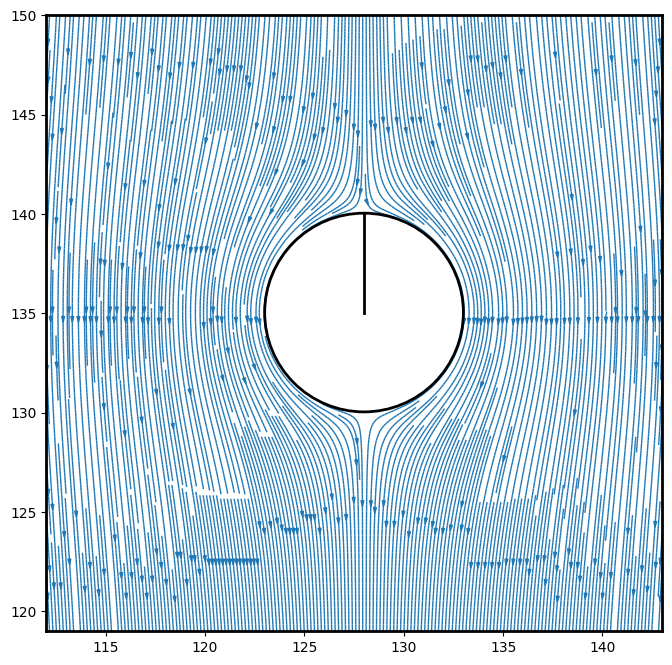

In [45]:
path = "2023/00/30/"
beta = "0"
betaf = 0
time = 12000
# time = 110418
boxsize = 16
borderwidth = 2
U = np.loadtxt(path + "U"+beta + "_"+str(time) + ".txt")
V = np.loadtxt(path + "V"+beta + "_"+str(time) + ".txt")
px = np.loadtxt(path + "px" + beta + "_"+str(time) + ".txt")
py = np.loadtxt(path + "py" + beta + "_"+str(time) + ".txt")
velx = np.loadtxt(path + "velx" + beta + "_"+str(time) + ".txt")
vely = np.loadtxt(path + "vely" + beta + "_"+str(time) + ".txt")
theta = np.loadtxt(path + "theta" + beta + "_"+str(time) + ".txt")
U -= velx
V -= vely
U = U[int(py) - boxsize:int(py) + boxsize,int(px) - boxsize:int(px) + boxsize]  # == Lons[Xspan[0]:Xspan[1]+1, Yspan[0]:Yspan[1]+1]
V = V[int(py) - boxsize:int(py) + boxsize,int(px) - boxsize:int(px) + boxsize]
Y, X = np.mgrid[int(py) - boxsize:int(py) + boxsize,int(px) - boxsize:int(px) + boxsize]

# for i in range(boxsize*2):
#     for j in range(boxsize*2):
rotTheta = -np.pi*(1.0/2.0)
rotX = (X-px) * np.cos(rotTheta) - (Y-py) * np.sin(rotTheta)
rotY = (X-px) * np.sin(rotTheta) + (Y-py) * np.cos(rotTheta)
theta = np.arctan2(rotY,rotX)
nonRottheta = np.arctan2(Y-py,X-px)
plt.pcolormesh(theta)
# plt.show()
dist = np.sqrt((X-px)**2 + (Y-py)**2) 
pRadius = 5.0
B1 = 0.001
B2 = B1 * betaf
er = erCoeff(B1,1,pRadius,dist,theta) + erCoeff(B2,2,pRadius,dist,theta)
etheta = ethetaCoeff(B1,1,pRadius,dist,theta) + ethetaCoeff(B2,2,pRadius,dist,theta)

U = er * np.cos(nonRottheta) - etheta * np.sin(nonRottheta)
V = er * np.sin(nonRottheta) + etheta * np.cos(nonRottheta)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.spines['top'].set_linewidth(borderwidth)
ax.spines['bottom'].set_linewidth(borderwidth)
ax.spines['left'].set_linewidth(borderwidth)
ax.spines['right'].set_linewidth(borderwidth)
speed = np.sqrt(U**2 + V**2)
nspeed = speed / speed.max();

# lw = 4 * nspeed
# streamdens = 1.5
# lw = 1 * nspeed
lw = 1 
streamdens = 6

arrsty = patches.ArrowStyle("Simple",head_length=.4, head_width=.2, tail_width=.0)
ax.streamplot(X,Y,U,V, density = streamdens,linewidth = lw,arrowstyle=arrsty, arrowsize=1,cmap='plasma')

p1pos = (px, py)
# p1pos = (px[0], py[0])
# p2pos = (px[1], py[1])
p1direction = (0,1)
particle1 = plt.Circle(p1pos, pRadius, fill=True,linewidth=2,zorder=10,edgecolor="black",facecolor="white")
ax.plot([px, px + pRadius*p1direction[0]], [py,py + pRadius*p1direction[1]], color='black', linewidth=2,zorder = 20)
# ax.plot([px[0], px[0] + pRadius*p1direction[0]], [py[0],py[0] + pRadius*p1direction[1]], color='black', linewidth=2,zorder = 20)
# particle2 = plt.Circle(p2pos, pRadius, fill=True,linewidth=2,zorder=10,edgecolor="black",facecolor="white")
# ax.plot([px[1], px[1] + pRadius*p2direction[0]], [py[1],py[1] + pRadius*p2direction[1]], color='black', linewidth=2,zorder = 20)
ax.add_patch(particle1)


# ax.add_patch(particle2)
ax.set(aspect='equal')
# axes[index].set_facecolor('black')
# plt.title(i)
print(ax.get_xlim())
# ax.set_xlim((96.0, 159.0))
# ax.set_ylim((96.0, 159.0))
# if i==times[0]:
#     ax.set_ylabel("y [lattice units]",fontsize=12)
# ax.set_xlabel("x [lattice units]",fontsize=12)
# Change the x and y ticks
# ax.set_xticks([108,128,148])  # Specify the locations of the x ticks
# ax.set_yticks([108,128,148])  # Specify the locations of the y ticks
# if i == times[0]:
#     ax.tick_params(axis='both', which='major', labelsize=12,length = 5, width = 2.5)
# else :
#     ax.tick_params(axis='x', which='major', labelsize=12,length = 5, width = 2.5)
#     ax.tick_params(axis='y', which='major', labelsize=12,length = 0, width = 0)

# You can also set custom labels for the ticks if desired
# ax.set_xticklabels(['96', '128', '144'])  # Set custom labels for the x ticks
# ax.set_yticklabels(['96', '128', '144'])  # Set custom labels for the y ticks
# axes[index].set_xlabel("x [lattice units]")
# axes[index].set_ylabel("y [lattice units]")
# index+=1
# print(index)

(112.0, 143.0)
(178.0, 209.0)
(110.34792054450298, 144.59858973587845)
(110.34684401108844, 144.62119693758405)
(178.0, 209.0)
(110.33464087541404, 144.62177803928282)


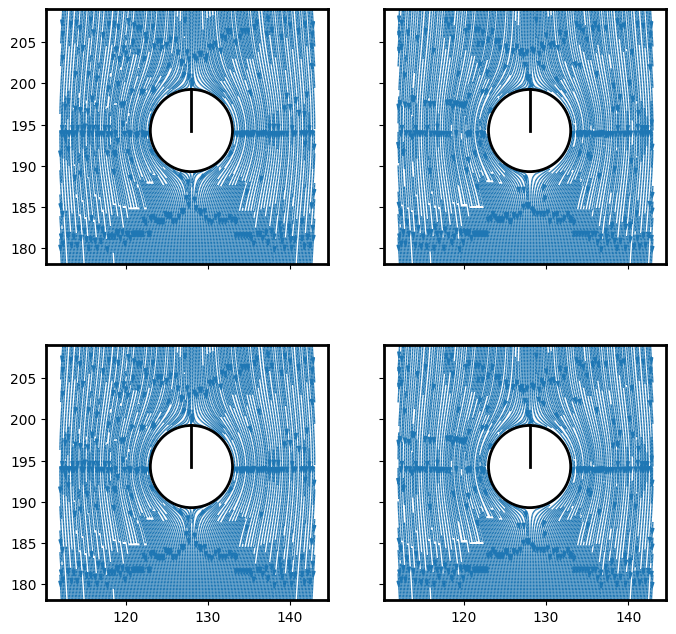

In [36]:
path = "2023/00/31/"
boxsize = 16
betas = ['0','0']
time = 101000
# betas = ['5','5','5']
borderwidth = 2
fig, axes = plt.subplots(ncols=2,nrows=len(betas),sharex=True, sharey=True,figsize=(8,8))
betaIndex = 0
for beta in betas:
    U = np.loadtxt(path + "U"+beta + "_"+str(time) + ".txt")
    V = np.loadtxt(path + "V"+beta + "_"+str(time) + ".txt")
    px = np.loadtxt(path + "px" + beta + "_"+str(time) + ".txt")
    py = np.loadtxt(path + "py" + beta + "_"+str(time) + ".txt")
    velx = np.loadtxt(path + "velx" + beta + "_"+str(time) + ".txt")
    vely = np.loadtxt(path + "vely" + beta + "_"+str(time) + ".txt")
    theta = np.loadtxt(path + "theta" + beta + "_"+str(time) + ".txt")
    U -= velx
    V -= vely
    U = U[int(py) - boxsize:int(py) + boxsize,int(px) - boxsize:int(px) + boxsize]  # == Lons[Xspan[0]:Xspan[1]+1, Yspan[0]:Yspan[1]+1]
    V = V[int(py) - boxsize:int(py) + boxsize,int(px) - boxsize:int(px) + boxsize]
    Y, X = np.mgrid[int(py) - boxsize:int(py) + boxsize,int(px) - boxsize:int(px) + boxsize]

    # U = U[0:int(py) + boxsize,int(px) - boxsize:int(px) + boxsize]  # == Lons[Xspan[0]:Xspan[1]+1, Yspan[0]:Yspan[1]+1]
    # V = V[0:int(py) + boxsize,int(px) - boxsize:int(px) + boxsize]
    # Y, X = np.mgrid[0:int(py) + boxsize,int(px) - boxsize:int(px) + boxsize]
        
    ax = axes[betaIndex][0]
    ax.spines['top'].set_linewidth(borderwidth)
    ax.spines['bottom'].set_linewidth(borderwidth)
    ax.spines['left'].set_linewidth(borderwidth)
    ax.spines['right'].set_linewidth(borderwidth)
    speed = np.sqrt(U**2 + V**2)
    # nspeed = speed / speed.max();
    lw = 1
    streamdens = 6

    arrsty = patches.ArrowStyle("Simple",head_length=.4, head_width=.2, tail_width=.0)
    ax.streamplot(X,Y,U,V,density = streamdens,linewidth = lw,arrowstyle=arrsty, arrowsize=1,cmap='plasma')

    p1pos = (px, py)
    p1direction = (0,1)
    pRadius = 5.0
    particle1 = plt.Circle(p1pos, pRadius, fill=True,linewidth=2,zorder=10,edgecolor="black",facecolor="white")
    ax.plot([px, px + pRadius*p1direction[0]], [py,py + pRadius*p1direction[1]], color='black', linewidth=2,zorder = 20)
    ax.add_patch(particle1)
    ax.set(aspect='equal')
    print(ax.get_xlim())
    print(ax.get_ylim())
    xlim = (px-boxsize, px+boxsize)
    ylim = (py-boxsize, py+boxsize)
    # ax.set_xlim(xlim)
    # ax.set_ylim(ylim)

    rotTheta = -np.pi*(1.0/2.0)
    rotX = (X-px) * np.cos(rotTheta) - (Y-py) * np.sin(rotTheta)
    rotY = (X-px) * np.sin(rotTheta) + (Y-py) * np.cos(rotTheta)
    theta = np.arctan2(rotY,rotX)
    nonRottheta = np.arctan2(Y-py,X-px)
    dist = np.sqrt((X-px)**2 + (Y-py)**2) 
    pRadius = 5.0
    B1 = 0.001
    B2 = B1 * betaf
    er = erCoeff(B1,1,pRadius,dist,theta) + erCoeff(B2,2,pRadius,dist,theta)
    etheta = ethetaCoeff(B1,1,pRadius,dist,theta) + ethetaCoeff(B2,2,pRadius,dist,theta)

    U = er * np.cos(nonRottheta) - etheta * np.sin(nonRottheta)
    V = er * np.sin(nonRottheta) + etheta * np.cos(nonRottheta)
    ax = axes[betaIndex][1]
    ax.spines['top'].set_linewidth(borderwidth)
    ax.spines['bottom'].set_linewidth(borderwidth)
    ax.spines['left'].set_linewidth(borderwidth)
    ax.spines['right'].set_linewidth(borderwidth)
    speed = np.sqrt(U**2 + V**2)
    # nspeed = speed / speed.max();

    lw = 1 
    streamdens = 6

    arrsty = patches.ArrowStyle("Simple",head_length=.4, head_width=.2, tail_width=.0)
    ax.streamplot(X,Y,U,V,density = streamdens,linewidth = lw,arrowstyle=arrsty, arrowsize=1,cmap='plasma')

    p1pos = (px, py)
    p1direction = (0,1)
    particle1 = plt.Circle(p1pos, pRadius, fill=True,linewidth=2,zorder=10,edgecolor="black",facecolor="white")
    ax.plot([px, px + pRadius*p1direction[0]], [py,py + pRadius*p1direction[1]], color='black', linewidth=2,zorder = 20)
    ax.add_patch(particle1)
    ax.set(aspect='equal')
    print(ax.get_xlim())
    betaIndex+=1
    # ax.set_xlim(xlim)
    # ax.set_ylim(ylim)
plt.show()